In [ ]:
#step 1 install necessary libraries
#py -m pip install scikit learn
#pip install matplotlib
#pip install seaborn
#pip install pandas

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [88]:
from sklearn.linear_model import LinearRegression

In [106]:
FullfilmentData = pd.read_csv(r"C:\Users\eshab\Downloads\LiteracyAndFullfilmentAggregationReport\WHR_2019.csv")
LiteracyData = pd.read_excel(r"C:\Users\eshab\Downloads\LiteracyAndFullfilmentAggregationReport\regional-agg_LiteracyRate.xlsx")

In [108]:
FullfilmentData.info()
                # view data
FullfilmentData.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       156 non-null    object 
 1   region                        156 non-null    object 
 2   happiness_score               156 non-null    float64
 3   gdp_per_capita                156 non-null    float64
 4   social_support                156 non-null    float64
 5   healthy_life_expectancy       156 non-null    float64
 6   freedom_to_make_life_choices  156 non-null    float64
 7   generosity                    156 non-null    float64
 8   perceptions_of_corruption     156 non-null    float64
dtypes: float64(7), object(2)
memory usage: 11.1+ KB


,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,Western Europe,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,Western Europe,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,Western Europe,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,Western Europe,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [110]:
#change the column title 'country' to 'Country' so that it can be successfully merged later on
FullfilmentData = FullfilmentData.rename(columns = {'country':'Country'})

#view if successful...
FullfilmentData.head()

,Country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,Western Europe,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,Western Europe,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,Western Europe,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,Western Europe,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [112]:
LiteracyData.info()
                    #view data
LiteracyData.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   0 non-null      float64
 1   Unnamed: 1   225 non-null    object 
 2   Unnamed: 2   190 non-null    object 
 3   Unnamed: 3   101 non-null    object 
 4   Unnamed: 4   42 non-null     object 
 5   Unnamed: 5   60 non-null     object 
 6   Unnamed: 6   56 non-null     object 
 7   Unnamed: 7   90 non-null     object 
 8   Unnamed: 8   71 non-null     object 
 9   Unnamed: 9   71 non-null     object 
 10  Unnamed: 10  182 non-null    object 
dtypes: float64(1), object(10)
memory usage: 20.1+ KB


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,Country,Region,Sub-region,Least developed countries (LDC),Africa sub-regions,Africa region,Total,Male,Female,Total population
1,NaN,Afghanistan,SA,NaN,LDC,NaN,NaN,65.42055,74.0848,56.25475,8071.334
2,NaN,Albania,ECA,EECA,NaN,NaN,NaN,99.33,99.05,99.63,458.058
3,NaN,Algeria,MENA,NaN,NaN,Northern Africa,All,97.42652,97.59406,97.25216,6070.282
4,NaN,Andorra,ECA,WE,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
#fix the 2nd row in FullfilmentData to become the column titles instead
LiteracyData.columns = LiteracyData.iloc[0]
LiteracyData = LiteracyData.drop(0)          #delete the row we copied from

## DO NOT RUN THIS AGAIN AFTER THE FIRST TIME BECAUSE ERROR WILL RESULT DUE TO LINE 3'S NATURE

In [116]:
#now view:
print(LiteracyData.columns)
print(FullfilmentData.columns)

Index([                              nan,                         'Country',
                                'Region',                      'Sub-region',
       'Least developed countries (LDC)',              'Africa sub-regions',
                         'Africa region',                           'Total',
                                  'Male',                          'Female',
                      'Total population'],
      dtype='object', name=0)
Index(['Country', 'region', 'happiness_score', 'gdp_per_capita',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption'],
      dtype='object')


In [118]:
#Finally merge both tables into one data frame:
MergedData = pd.merge(LiteracyData, FullfilmentData, how='inner', on='Country')

MergedData.head()

,NaN,Country,Region,Sub-region,Least developed countries (LDC),Africa sub-regions,Africa region,Total,Male,Female,Total population,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,NaN,Afghanistan,SA,NaN,LDC,NaN,NaN,65.42055,74.0848,56.25475,8071.334,South Asia,3.203,0.350,0.517,0.361,0.000,0.158,0.025
1,NaN,Albania,ECA,EECA,NaN,NaN,NaN,99.33,99.05,99.63,458.058,Central and Eastern Europe,4.719,0.947,0.848,0.874,0.383,0.178,0.027
2,NaN,Algeria,MENA,NaN,NaN,Northern Africa,All,97.42652,97.59406,97.25216,6070.282,Middle East and North Africa,5.211,1.002,1.160,0.785,0.086,0.073,0.114
3,NaN,Argentina,LAC,NaN,NaN,NaN,NaN,99.50552,99.24183,99.75765,7017.353,Latin America and Caribbean,6.086,1.092,1.432,0.881,0.471,0.066,0.050
4,NaN,Armenia,ECA,EECA,NaN,NaN,NaN,NaN,NaN,NaN,366.885,Central and Eastern Europe,4.559,0.850,1.055,0.815,0.283,0.095,0.064


In [126]:
#Change specific column names to specify which data represents literacy rates and an aspect of measuring fulfillment
MergedData = MergedData.rename(columns = {'Total':'Combined_Literacy'})
MergedData.head()
print(MergedData.columns)

Index([                           nan,                      'Country',
                             'Region',            'Combined_Literacy',
                               'Male',                       'Female',
                   'Total population',                       'region',
                    'happiness_score',               'gdp_per_capita',
                     'social_support',      'healthy_life_expectancy',
       'freedom_to_make_life_choices',                   'generosity',
          'perceptions_of_corruption'],
      dtype='object')


In [164]:
#Dropping the NaN, Africa Region, Africa sub-region, LDC, and sub-region columns for a cleaner look since they have the most insignificant NaN values:
MergedData.drop(columns=['Africa region', 'Least developed countries (LDC)', 'Africa sub-regions', 'Sub-region'], inplace=True) ##inplace=True overwrites the original data frame

# Check for NaN values before dropping
print("Before dropping NaN values:")
print(MergedData[['Combined_Literacy', 'happiness_score']].isnull().sum())

# Apply dropna to remove rows with NaN in specified columns
MergedData.dropna(subset=['Combined_Literacy', 'happiness_score'], inplace=True)

# Check after dropping NaN values
print("\nAfter dropping NaN values:")
print(MergedData[['Combined_Literacy', 'happiness_score']].isnull().sum())


Before dropping NaN values:
Combined_Literacy    84
happiness_score       0
dtype: int64

After dropping NaN values:
Combined_Literacy    0
happiness_score      0
dtype: int64


In [166]:
print(MergedData.dtypes)

NaN                             float64
Country                          object
Region                           object
Combined_Literacy               float64
Male                             object
Female                           object
Total population                 object
region                           object
happiness_score                 float64
gdp_per_capita                  float64
social_support                  float64
healthy_life_expectancy         float64
freedom_to_make_life_choices    float64
generosity                      float64
perceptions_of_corruption       float64
dtype: object


In [168]:
#Lots of objects and floats that need to be converted into numeric values
MergedData["Combined_Literacy"] = pd.to_numeric(MergedData["Combined_Literacy"], errors="coerce")
                                                                                    #errors='coerce' converts non-numeric values to NaN instead of showing an error
MergedData["happiness_score"] = pd.to_numeric(MergedData["happiness_score"], errors="coerce")
print(MergedData.dtypes)

NaN                             float64
Country                          object
Region                           object
Combined_Literacy               float64
Male                             object
Female                           object
Total population                 object
region                           object
happiness_score                 float64
gdp_per_capita                  float64
social_support                  float64
healthy_life_expectancy         float64
freedom_to_make_life_choices    float64
generosity                      float64
perceptions_of_corruption       float64
dtype: object


In [ ]:
MergedData.head()

In [170]:
print(MergedData[['Combined_Literacy', 'happiness_score']].isnull().sum())
print((MergedData[['Combined_Literacy', 'happiness_score']] == float('inf')).sum())

Combined_Literacy    0
happiness_score      0
dtype: int64
Combined_Literacy    0
happiness_score      0
dtype: int64


In [172]:
#Save this merged data into a file
#Leave this at the end of cleaning data so that it can be re-run as need be to keep up with the updates
MergedData.to_csv('MergedDataCapstone.csv', index=False)
print("Merged data saved as 'merged_data.csv'")

Merged data saved as 'merged_data.csv'


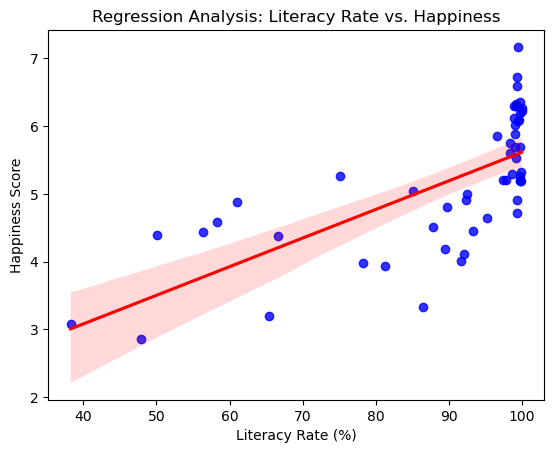

Correlation coefficient: 0.6893972249293138

Regression Results:
                            OLS Regression Results                            
Dep. Variable:        happiness_score   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     46.19
Date:                Fri, 28 Mar 2025   Prob (F-statistic):           1.14e-08
Time:                        07:08:14   Log-Likelihood:                -56.516
No. Observations:                  53   AIC:                             117.0
Df Residuals:                      51   BIC:                             121.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

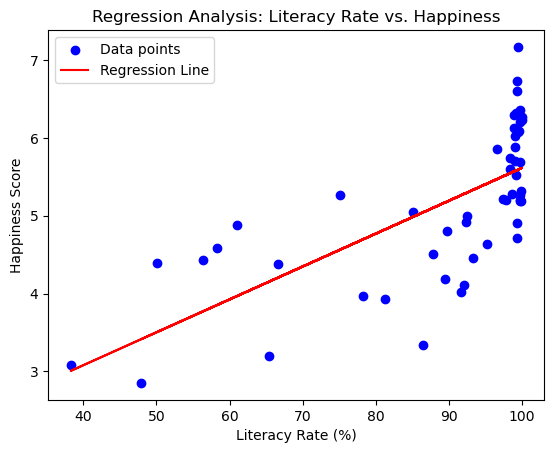

In [174]:
#visualize the distribution
sns.regplot(x='Combined_Literacy', y='happiness_score', data=MergedData, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
        #x is for independent var and y is for dependant var
# Add labels and title
plt.xlabel('Literacy Rate (%)')
plt.ylabel('Happiness Score')
plt.title('Regression Analysis: Literacy Rate vs. Happiness')
plt.show()

# Correlation Coefficient (Pearson's r)
correlation = MergedData['happiness_score'].corr(MergedData['Combined_Literacy'])
print(f"Correlation coefficient: {correlation}")

# Perform Regression Analysis using statsmodels
# Add constant (intercept term) to the model
X = MergedData['Combined_Literacy']
X = sm.add_constant(X)  # Adds a constant column for the intercept
y = MergedData['happiness_score']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print regression results
print("\nRegression Results:")
print(model.summary())

# Get the regression line
regression_line = model.predict(X)

# Plot the regression line on top of the scatter plot
plt.scatter(MergedData['Combined_Literacy'], MergedData['happiness_score'], color='blue', label='Data points')
plt.plot(MergedData['Combined_Literacy'], regression_line, color='red', label='Regression Line')
plt.xlabel('Literacy Rate (%)')
plt.ylabel('Happiness Score')
plt.title('Regression Analysis: Literacy Rate vs. Happiness')
plt.legend()
plt.show()